In [2]:
import pandas as pd
import os
papers = pd.read_csv('feedback.csv')
papers.head()

,Sl no,text
0,303,All
1,22,All baby toys not for groneups
2,206,All of the above
3,90,All the seats are taken by the staff
4,405,Alreem


In [4]:
papers.columns

Index(['Sl no', 'text'], dtype='object')

In [9]:
# Remove the columns
#papers = papers.drop(columns=['Sl no'], axis=1)
papers.head()

,text
0,All
1,All baby toys not for groneups
2,All of the above
3,All the seats are taken by the staff
4,Alreem


In [11]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

0                                     all
1          all baby toys not for groneups
2                        all of the above
3    all the seats are taken by the staff
4                                  alreem
Name: paper_text_processed, dtype: object

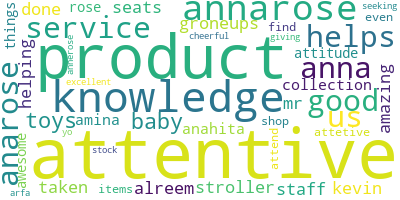

In [13]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [15]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitin.b\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[]


In [18]:
data_words = remove_stopwords(data_words)
data_words


[[],
 ['baby', 'toys', 'groneups'],
 [],
 ['seats', 'taken', 'staff'],
 ['alreem'],
 ['amazing',
  'service',
  'done',
  'mr',
  'kevin',
  'helping',
  'stroller',
  'collection'],
 ['amina'],
 ['anahita'],
 ['anarose', 'good', 'product', 'knowledge', 'attentive'],
 ['anarose', 'product', 'knowledge', 'attentive', 'good', 'attitude'],
 ['anna', 'helps', 'us', 'get', 'things', 'awesome'],
 ['anna', 'rose', 'attetive', 'helps', 'find', 'items', 'even', 'shop'],
 ['annarose', 'attend', 'cheerful', 'attentive'],
 ['annarose', 'attentive', 'seeking', 'stock', 'product', 'knowledge'],
 ['annarose', 'giving', 'excellent', 'service', 'yo', 'us'],
 ['annerose'],
 ['arfa'],
 []]

In [21]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
corpus

[[],
 [(0, 1), (1, 1), (2, 1)],
 [],
 [(3, 1), (4, 1), (5, 1)],
 [(6, 1)],
 [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(15, 1)],
 [(16, 1)],
 [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1)],
 [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)],
 [(23, 1), (26, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)],
 [(18, 1), (35, 1), (36, 1), (37, 1)],
 [(18, 1), (20, 1), (21, 1), (35, 1), (38, 1), (39, 1)],
 [(13, 1), (28, 1), (35, 1), (40, 1), (41, 1), (42, 1)],
 [(43, 1)],
 [(44, 1)],
 []]

In [22]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.147*"baby" + 0.147*"toys" + 0.147*"groneups" + 0.013*"anahita" + '
  '0.013*"arfa" + 0.013*"annerose" + 0.013*"amina" + 0.013*"attentive" + '
  '0.013*"alreem" + 0.013*"knowledge"'),
 (1,
  '0.200*"alreem" + 0.018*"anahita" + 0.018*"arfa" + 0.018*"amina" + '
  '0.018*"annerose" + 0.018*"attentive" + 0.018*"annarose" + 0.018*"knowledge" '
  '+ 0.018*"product" + 0.018*"anarose"'),
 (2,
  '0.145*"annarose" + 0.076*"yo" + 0.076*"giving" + 0.076*"service" + '
  '0.076*"excellent" + 0.076*"us" + 0.076*"attentive" + 0.076*"cheerful" + '
  '0.076*"attend" + 0.007*"anahita"'),
 (3,
  '0.088*"amazing" + 0.088*"helping" + 0.088*"kevin" + 0.088*"collection" + '
  '0.088*"mr" + 0.088*"done" + 0.088*"service" + 0.088*"stroller" + '
  '0.008*"anahita" + 0.008*"attentive"'),
 (4,
  '0.059*"shop" + 0.059*"even" + 0.059*"rose" + 0.059*"annarose" + '
  '0.059*"items" + 0.059*"product" + 0.059*"knowledge" + 0.059*"find" + '
  '0.059*"attetive" + 0.059*"helps"'),
 (5,
  '0.114*"good" + 0.114*"kno

In [25]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))



In [ ]:

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)



In [ ]:

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared